In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# class arguments:
#     def __init__(self, cond_block, cond_decoding, applyBaseline_bool, mtdt_feat, occ_channels):
#         self.cond_block = cond_block #'later' #{early,later}
#         self.cond_decoding = cond_decoding #'removeevoked' #{none,removeevoked,resampled}
#         self.applyBaseline_bool = applyBaseline_bool #'False'
#         self.mtdt_feat = mtdt_feat
#         self.occ_channels = occ_channels
        
#         self.SAVE_EPOCH_ROOT = '../../../data/version5.2/preprocessed/epochs/aft_ICA_rej/'
#         self.SAVE_RESULT_ROOT = '../../../results/ERPs/eCortex/'
#         self.cond_filter ='none' # {none,non_symm}
#         self.cond_time = 'prestim' #{prestim,poststim}
#         self.subj_num = 1
#         self.pre_tmin = -0.4
#         self.pre_tmax = 0.05
#         self.post_tmin = 0.05
#         self.post_tmax = 0.45
#         self.num_classes = 2
#         self.normalization_type = 'normal'# {normal,lstmPaper}
#         self.gen_rand_perm = 0
#         self.null_max_iter = 10000
#         self.loop_null_iter = 5
#         self.gen_decoder_scores = 1
#         self.random_state = 42 
#         self.max_iter = 10000
#         self.n_jobs = 1
#         self.scoring = 'roc_auc'
#         self.n_splits = 100
#         print(self.SAVE_RESULT_ROOT)


In [3]:
class arguments:
    def __init__(self, cond_block, cond_decoding, applyBaseline_bool, mtdt_feat, occ_channels):
        self.cond_block = cond_block #'later' #{early,later}
        self.cond_decoding = cond_decoding #'removeevoked' #{none,removeevoked,resampled}
        self.applyBaseline_bool = applyBaseline_bool #'False'
        self.mtdt_feat = mtdt_feat
        self.occ_channels = occ_channels
        
        self.SAVE_EPOCH_ROOT = '../../../data/version5.2/preprocessed/epochs/aft_ICA_rej/'
        self.SAVE_RESULT_ROOT = '../../../results/temp_gen/blanca/'
        self.cond_filter ='none' # {none,non_symm}
        self.cond_time = 'prestim' #{prestim,poststim}
        self.subj_num = 1
        self.pre_tmin = -0.4
        self.pre_tmax = 0.05
        self.post_tmin = 0.05
        self.post_tmax = 0.45
        self.num_classes = 2
        self.normalization_type = 'normal'# {normal,lstmPaper}
        self.gen_rand_perm = 0
        self.null_max_iter = 10000
        self.loop_null_iter = 5
        self.gen_decoder_scores = 1
        self.random_state = 42 
        self.max_iter = 10000
        self.n_jobs = 1
        self.scoring = 'roc_auc'
        self.n_splits = '_3k'
        self.smooth_lvl = 55
        self.occ_channels = 'True'
        print(self.SAVE_RESULT_ROOT)




# Autocorrelation

In [4]:
def set_fonts():
    from matplotlib.font_manager import FontProperties
    font = FontProperties()
    font.set_family('serif')
    font.set_name('Calibri')
    return font

def plot_autocorr_eachGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax):
    
    font=set_fonts()
    fsize_t=30
    fsize_x=26
    
    # EARLY ==================================================================================
    fig, axs = plt.subplots(3, 2, figsize=(15,15))
    ax = axs[0][0]
    im = ax.imshow(avgmap_e[0,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc1', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[0][1]
    im = ax.imshow(avgmap_e[1,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_title('Loc2', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[1][0]
    im = ax.imshow(avgmap_e[2,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc3', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    ax = axs[1][1]
    im = ax.imshow(avgmap_e[3,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Testing Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc4', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    ax.xaxis.set_ticks_position('bottom')
    plt.colorbar(im, ax=ax)

    
    avggrp_e = np.mean(avgmap_e, axis=0)
    ax = axs[2][0]
    im = ax.imshow(avggrp_e, interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Average', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    fig.delaxes(axs[2][1])
    plt.tight_layout()
    plt.suptitle( 'earlyBlocks   -    ' + title, fontproperties=font, fontsize=fsize_t, fontweight='bold',  y=1.05)
    plt.tight_layout()
    
    # LATER ==================================================================================
    fig, axs = plt.subplots(3, 2, figsize=(15,15))
    ax = axs[0][0]
    im = ax.imshow(avgmap_l[0,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc1', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[0][1]
    im = ax.imshow(avgmap_l[1,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_title('Loc2', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[1][0]
    im = ax.imshow(avgmap_l[2,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc3', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    ax = axs[1][1]
    im = ax.imshow(avgmap_l[3,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc4', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    ax.xaxis.set_ticks_position('bottom')
    plt.colorbar(im, ax=ax)

    
    avggrp_l = np.mean(avgmap_l, axis=0)
    ax = axs[2][0]
    im = ax.imshow(avggrp_l, interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Average', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    fig.delaxes(axs[2][1])
    plt.tight_layout()
    plt.suptitle( 'laterBlocks   -    ' + title, fontproperties=font, fontsize=fsize_t, fontweight='bold',  y=1.05)
    plt.tight_layout()


    plt.show()

In [5]:
def combine_subj_ERPs(args, subj_p1, subj_p2):

    ERP_p1=[]
    ERP_p2=[]
    ind_Grps_dt=4
    
    for subj_id in subj_p1:
        print('subject id:', subj_id)
        main_ptrn = 1
        args.subj_num = subj_id

        fn_str_sbj='%sBlocks_%sFilter_PrePost_decod%s_bsline%s_%sChann_%s_Subj_%s' \
                    %(args.cond_block, args.cond_filter, \
                      args.cond_decoding, args.applyBaseline_bool, \
                      args.occ_channels, args.mtdt_feat, args.subj_num)

        fn_str = args.SAVE_RESULT_ROOT + 'ERP_P%s_' %(main_ptrn) + fn_str_sbj


        with open(fn_str, 'rb') as f:
            erps = pickle.load(f)
            
        erps_avgG1 = np.mean(erps[ind_Grps_dt].copy(), axis=1)
        ERP_p1.append(erps_avgG1.copy())


    for subj_id in subj_p2:
        main_ptrn = 2
        args.subj_num = subj_id

        fn_str_sbj='%sBlocks_%sFilter_PrePost_decod%s_bsline%s_%sChann_%s_Subj_%s' \
                    %(args.cond_block, args.cond_filter, \
                      args.cond_decoding, args.applyBaseline_bool, \
                      args.occ_channels, args.mtdt_feat, args.subj_num)

        fn_str = args.SAVE_RESULT_ROOT + 'ERP_P%s_' %(main_ptrn) + fn_str_sbj


        with open(fn_str, 'rb') as f:
            erps = pickle.load(f)

        erps_avgG2 = np.mean(erps[ind_Grps_dt].copy(), axis=1)
        ERP_p2.append(erps_avgG2.copy())
        
    print('p1 subjects:',np.asarray(ERP_p1).shape)
    print('p2 subjects', np.asarray(ERP_p2).shape)

    p1=np.asarray(ERP_p1)
    p2=np.asarray(ERP_p2)
    p=np.concatenate((p1, p2), axis=0)

    subset = erps[0].copy()
    
    return p, subset

In [6]:
"""
Reading and preparing epoch data to create each 4 grous and 2 pattern
"""
import mne
import numpy as np
from scipy.signal import savgol_filter

def read_prep_epochs(args):


    if args.applyBaseline_bool:
        filename_epoch = args.SAVE_EPOCH_ROOT + \
                         'epochs_sec_applyBaseline_subj%s-afterRejICA-epo.fif' \
                          %args.subj_num
    else:
        filename_epoch = args.SAVE_EPOCH_ROOT + \
                         'epochs_sec_subj%s-afterRejICA-epo.fif' \
                         %args.subj_num
    epochs_orig = mne.read_epochs(filename_epoch, proj=True, preload=True,
                                  verbose=None)
    epochs = epochs_orig.copy()
    subset = epochs['pred']['non'].copy()
    subset = subset.pick_types(eeg=True)
    if (args.cond_decoding=='removeevoked'):
        # REMOVE EVOKED RESP.
        subset.subtract_evoked()    # remove evoked response
    elif (args.cond_decoding=='resampled'):
        # RESAMPLE
        subset = subset.resample(args.n_resampling, npad='auto')
    else:
        pass
    ##==========================================================================
    # Select EEG channels of the back
    if args.occ_channels:
        picks_back_brain = ['E56', 'E63', 'E68', 'E73', 'E81', 'E88', 'E94', 'E99', 'E107',
        'E57', 'E64', 'E69', 'E74', 'E82', 'E89', 'E95', 'E100',
        'E50', 'E58', 'E65', 'E70', 'E75', 'E83', 'E90', 'E96', 'E101',
        'E51', 'E59', 'E66', 'E71', 'E76', 'E84', 'E91', 'E97',
        'E52', 'E60', 'E67', 'E72', 'E77', 'E85', 'E92'
        'E53', 'E61', 'E62', 'E78','E86'
        ]
        subset = subset.pick_types(eeg=True, selection=picks_back_brain)
    ##==========================================================================
    if subset['Block==7'].metadata.Ptrn_Type.values.shape[0]>0:
       main_ptrn = subset['Block==7'].metadata.Ptrn_Type.values[0]
    else:
       main_ptrn = subset['Block==8'].metadata.Ptrn_Type.values[0]
    ##==========================================================================
    if args.cond_block=='early': #block 3-6
        subset = subset['Block<7'].copy()
        subset = subset['Block>2'].copy()
    elif args.cond_block=='later':#block 7-10
        subset = subset['Block<11'].copy()
        subset = subset['Block>6'].copy()
    elif args.cond_block=='diff':
        se = subset['Block<7'].copy() # early blocks
        se = se['Block>2'].copy()
        print('earlier blocks shape:\n')
        print(se._data.shape)
        sl= subset['Block<11'].copy() # later blocks
        sl = sl['Block>6'].copy()
        print('later blocks shape:\n')
        print(sl._data.shape)
        subset._data=sl._data-se._data

    ##==========================================================================
    subset= subset.crop(tmin=-0.45, tmax=0.45)
    # if (args.cond_time=='prestim'):
    #     subset= subset.crop(tmin=-0.4, tmax=0.05)
    # if (args.cond_time=='poststim'):
    #     subset= subset.crop(tmin=0.05, tmax=0.45)
    # print('Shape of data after crop time is\n :')
    print(subset._data.shape)
    ##==========================================================================
    # Group data based on the previous trial
     # Group data based on the current main loc
    Grp1 = subset['%s==1' %(args.mtdt_feat)].copy()
    Grp2 = subset['%s==2' %(args.mtdt_feat)].copy()
    Grp3 = subset['%s==3' %(args.mtdt_feat)].copy()
    Grp4 = subset['%s==4' %(args.mtdt_feat)].copy()

    # Grp1 = subset['Trgt_Loc_prev==1'].copy()
    # Grp2 = subset['Trgt_Loc_prev==2'].copy()
    # Grp3 = subset['Trgt_Loc_prev==3'].copy()
    # Grp4 = subset['Trgt_Loc_prev==4'].copy()
    if main_ptrn==1:
        Grp1 = Grp1['Trgt_Loc_main!=4'].copy()
        Grp2 = Grp2['Trgt_Loc_main!=1'].copy()
        Grp3 = Grp3['Trgt_Loc_main!=2'].copy()
        Grp4 = Grp4['Trgt_Loc_main!=3'].copy()
    ##==========================================================================
    frequencies = np.arange(3, 13, 2)
    if args.cond_decoding=='non_symm':
        Grp1 = apply_nonSymm_filter(Grp1, frequencies)
        Grp2 = apply_nonSymm_filter(Grp2, frequencies)
        Grp3 = apply_nonSymm_filter(Grp3, frequencies)
        Grp4 = apply_nonSymm_filter(Grp4, frequencies)
    ##==========================================================================
    inds = np.zeros((4,1))
    for iind in range(4):
        inds[iind] = subset['%s==%s' %(args.mtdt_feat, iind+1)]._data.shape[0]

    ind1=int(min(inds))
    ind2=subset['%s==1' %(args.mtdt_feat)]._data.shape[1]
    ind3=subset['%s==1' %(args.mtdt_feat)]._data.shape[2]
    print('minimum ind across four groups: ', ind1)
    ##==========================================================================
    # Equalize the number of each group
    # Grp1._data = Grp1._data[:ind1,:,:]
    # Grp2._data = Grp2._data[:ind1,:,:]
    # Grp3._data = Grp3._data[:ind1,:,:]
    # Grp4._data = Grp4._data[:ind1,:,:]
    ##==========================================================================
    print('the pattern for this subj is :=====================================')
    print(main_ptrn)
    print('          ')
    print('===================================================================')
    ##==========================================================================
    # Normalizing the data for each subject
    if args.normalization_type=='normal':
        Grp1._data = (Grp1._data - np.mean(Grp1._data)) / np.std(Grp1._data)
        Grp2._data = (Grp2._data - np.mean(Grp2._data)) / np.std(Grp2._data)
        Grp3._data = (Grp3._data - np.mean(Grp3._data)) / np.std(Grp3._data)
        Grp4._data = (Grp4._data - np.mean(Grp4._data)) / np.std(Grp4._data)
    elif args.normalization_type=='lstmPaper':
        Grp1._data = (2 * (Grp1._data - np.min(Grp1._data))) \
                        / (np.max(Grp1._data) - np.min(Grp1._data) - 1)
        Grp2._data = (2 * (Grp2._data - np.min(Grp2._data))) \
                        / (np.max(Grp2._data) - np.min(Grp2._data) - 1)
        Grp3._data = (2 * (Grp3._data - np.min(Grp3._data))) \
                        / (np.max(Grp3._data) - np.min(Grp3._data) - 1)
        Grp4._data = (2 * (Grp4._data - np.min(Grp4._data))) \
                        / (np.max(Grp4._data) - np.min(Grp4._data) - 1)
    ##==========================================================================
    Grps_dt = np.zeros((4, ind1, ind2, ind3))
    Grps_dt[0,:,:,:]=Grp1._data[:ind1,:,:]
    Grps_dt[1,:,:,:]=Grp2._data[:ind1,:,:]
    Grps_dt[2,:,:,:]=Grp3._data[:ind1,:,:]
    Grps_dt[3,:,:,:]=Grp4._data[:ind1,:,:]
    Grps_avg = np.mean(Grps_dt, axis=1)
    ##==========================================================================
    # smoothing data
    evk_data = np.mean(Grps_avg, axis=1)
    smooth_evk = np.zeros((5, evk_data.shape[1]))
    smooth_evk[0,:] = savgol_filter(evk_data[0,:], args.smooth_lvl, 3)
    smooth_evk[1,:] = savgol_filter(evk_data[1,:], args.smooth_lvl, 3)
    smooth_evk[2,:] = savgol_filter(evk_data[2,:], args.smooth_lvl, 3)
    smooth_evk[3,:] = savgol_filter(evk_data[3,:], args.smooth_lvl, 3)
    smooth_evk[4,:] = savgol_filter(np.mean(evk_data, 0), args.smooth_lvl, 3)
    ##==========================================================================
    # return Grp1, Grp2, Grp3, Grp4, main_ptrn
    return Grp1, Grp2, Grp3, Grp4, Grps_dt, Grps_avg, smooth_evk, main_ptrn



In [7]:
selected_subj_P1 = [1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 15, 16, \
                    42, 43, 44, 45, 47, 48, 51, 52, 53, \
                    55, 56, 57, 58, 59, 60, 61, 62, 63, 64, \
                    66, 67, 68, 69, 71, 72, 73, 74]
selected_subj_P2 = [18, 19, 20, 21, 23, 24, 26, 28, 29, 30, \
                   31, 32, 33, 34, 35, 36, 38, 39]

In [8]:
args = arguments('early', 'removeevoked', 'False', 'Trgt_Loc_main', 'False' )
Grp1, Grp2, Grp3, Grp4, Grps_dt, Grps_avg, smooth_evk, main_ptrn = read_prep_epochs(args)
subset = Grp1.copy()

../../../results/temp_gen/blanca/
Reading ../../../data/version5.2/preprocessed/epochs/aft_ICA_rej/epochs_sec_applyBaseline_subj1-afterRejICA-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 129) active
    Found the data of interest:
        t =    -400.00 ...    5000.00 ms
        0 CTF compensation matrices available
1197 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1197 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 16 columns
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Subtracting Evoked from Epochs
[done]


<ipython-input-6-d4a578902311>:63: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  subset= subset.crop(tmin=-0.45, tmax=0.45)


(352, 44, 213)
minimum ind across four groups:  84
the pattern for this subj is :=====================================
1
          


/Users/Maryam/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [9]:
subset

<EpochsFIF  |   93 events (all good), -0.4 - 0.448 sec, baseline [-0.4, 0], ~6.7 MB, data loaded, with metadata,
 'pred/left/non': 93>

# Conditions

In [10]:
# # early ------------- #
# # cond_block, cond_decoding, applyBaseline_bool, mtdt_feat, occ_channels)
# args = arguments('early', 'removeevoked', 'False', 'Trgt_Loc_main', 'False' )
# act_e, subset = combine_subj_ERPs(args, selected_subj_P1, selected_subj_P2)
# print('p early all subjects:',act_e.shape)

# # late ------------- #
# args = arguments('later', 'removeevoked', 'False', 'Trgt_Loc_main', 'False' )
# act_l, subset = combine_subj_ERPs(args, selected_subj_P1, selected_subj_P2)
# print('p later all subjects:',act_l.shape)


In [11]:
# # diff ------------- #
# act_d = act_l - act_e
# print('p diff all subjects:',act_d.shape)

# evk_data_e = np.mean(act_e, axis=0)
# evk_data_l = np.mean(act_l, axis=0)
# evk_data_d = np.mean(act_d, axis=0)

# print(act_e.shape)
# print(act_l.shape)
# print(act_d.shape)

# print(evk_data_e.shape)
# print(evk_data_l.shape)
# print(evk_data_d.shape)

# All channels

(4, 129, 213)
(4, 129, 213)


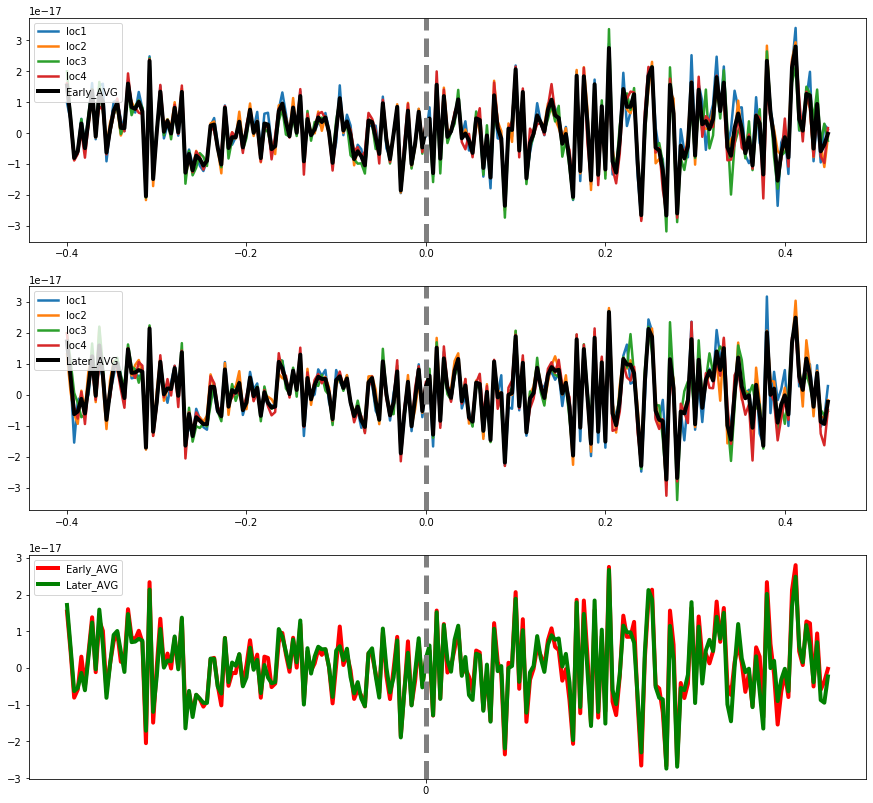

In [40]:
from scipy.signal import savgol_filter
import matplotlib.pylab as plt


fig, ax = plt.subplots(3,1,figsize=(15,14))

lw1=2.5
lw2=4

print(evk_data_e.shape)
print(evk_data_l.shape)
avgChann_e = np.mean(evk_data_e.copy(), axis=1)
avgChann_l = np.mean(evk_data_l.copy(), axis=1)

ax[0].plot(subset.times, avgChann_e[0,:], linewidth=lw1)
ax[0].plot(subset.times, avgChann_e[1,:], linewidth=lw1)
ax[0].plot(subset.times, avgChann_e[2,:], linewidth=lw1)
ax[0].plot(subset.times, avgChann_e[3,:], linewidth=lw1)
ax[0].plot(subset.times, np.mean(avgChann_e, 0), linewidth=lw2, color='black')

ax[0].legend(['loc1', 'loc2', 'loc3', 'loc4', 'Early_AVG'], loc='upper left')


avgChann_e = np.mean(evk_data_e.copy(), axis=1)

ax[1].plot(subset.times, avgChann_l[0,:], linewidth=lw1)
ax[1].plot(subset.times, avgChann_l[1,:], linewidth=lw1)
ax[1].plot(subset.times, avgChann_l[2,:], linewidth=lw1)
ax[1].plot(subset.times, avgChann_l[3,:], linewidth=lw1)
ax[1].plot(subset.times, np.mean(avgChann_l, 0), linewidth=lw2, color='black')

ax[1].legend(['loc1', 'loc2', 'loc3', 'loc4', 'Later_AVG'], loc='upper left')



plt.xticks(subset.times*1000)

ax[2].plot(subset.times, np.mean(avgChann_e, 0), color='red', linewidth=lw2)
ax[2].plot(subset.times, np.mean(avgChann_l, 0), color='green', linewidth=lw2)
ax[2].legend(['Early_AVG', 'Later_AVG'], loc='upper left')

for ii in range(3):
    ax[ii].axvline(x=0, color='gray', linewidth=5., linestyle='--')
plt.show()

# only occipital channels

In [12]:
from scipy.signal import savgol_filter
import matplotlib.pylab as plt

def plot_evoked_plotV1(evk_data_e_occ, evk_data_l_occ, title):
    fig, ax = plt.subplots(3,1,figsize=(15,14))
    
    fig.suptitle(title, fontsize=16)

    lw1=2.5
    lw2=4

    print(evk_data_e_occ.shape)
    print(evk_data_l_occ.shape)
    
    avgChann_e_occ = np.mean(evk_data_e_occ.copy(), axis=1)
    avgChann_l_occ = np.mean(evk_data_l_occ.copy(), axis=1)

    ax[0].plot(subset.times, avgChann_e_occ[0,:], linewidth=lw1)
    ax[0].plot(subset.times, avgChann_e_occ[1,:], linewidth=lw1)
    ax[0].plot(subset.times, avgChann_e_occ[2,:], linewidth=lw1)
    ax[0].plot(subset.times, avgChann_e_occ[3,:], linewidth=lw1)
    ax[0].plot(subset.times, np.mean(avgChann_e_occ, 0), linewidth=lw2, color='black')

    ax[0].legend(['loc1', 'loc2', 'loc3', 'loc4', 'Early_AVG'], loc='upper left')


#     avgChann_e = np.mean(evk_data_e.copy(), axis=1)

    ax[1].plot(subset.times, avgChann_l_occ[0,:], linewidth=lw1)
    ax[1].plot(subset.times, avgChann_l_occ[1,:], linewidth=lw1)
    ax[1].plot(subset.times, avgChann_l_occ[2,:], linewidth=lw1)
    ax[1].plot(subset.times, avgChann_l_occ[3,:], linewidth=lw1)
    ax[1].plot(subset.times, np.mean(avgChann_l_occ, 0), linewidth=lw2, color='black')

    ax[1].legend(['loc1', 'loc2', 'loc3', 'loc4', 'Later_AVG'], loc='upper left')



    plt.xticks(subset.times*1000)

    ax[2].plot(subset.times, np.mean(avgChann_e_occ, 0), color='red', linewidth=lw2)
    ax[2].plot(subset.times, np.mean(avgChann_l_occ, 0), color='green', linewidth=lw2)

    diff_sig_occ = np.mean(avgChann_l_occ.copy(), 0) - np.mean(avgChann_e_occ.copy(), 0)
    ax[2].plot(subset.times, diff_sig_occ, color='blue', linewidth=lw2, linestyle='--')
    ax[2].legend(['Early_AVG', 'Later_AVG', 'Diff (Late - Early)'], loc='upper left')

    for ii in range(3):
        ax[ii].axvline(x=0, color='gray', linewidth=5., linestyle='--')
        ax[ii].axhline(0, color='gray', linewidth=4., linestyle='--', alpha=0.3)

    plt.show()

In [13]:
subj_p1 = [1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 16, \
            43, 44, 45, 47, 48, 51, 52, \
            56, 57, 58, 59, 60, 61, 63, 64, \
           66, 67, 68, 69, 71, 72, 73]
subj_p2 = [18, 19, 20, 21, 23, 24, 26, 28, 29, 30, \
           31, 32, 33, 34, 35, 36, 38, 39]




# early ------------- #
# cond_block, cond_decoding, applyBaseline_bool, mtdt_feat, occ_channels)
args = arguments('early', 'removeevoked', 'False', 'Trgt_Loc_main', 'True' )
args.SAVE_RESULT_ROOT = '../../../results/ERPs/eCortex/'
act_e_occ, subset_occ = combine_subj_ERPs(args, subj_p1, subj_p2)
print('p early all subjects:',act_e_occ.shape)

# late ------------- #
args = arguments('later', 'removeevoked', 'False', 'Trgt_Loc_main', 'True' )
args.SAVE_RESULT_ROOT = '../../../results/ERPs/eCortex/'
act_l_occ, subset_occ = combine_subj_ERPs(args, subj_p1, subj_p2)
print('p later all subjects:',act_l_occ.shape)

# diff ------------- #
act_d_occ = act_l_occ - act_e_occ
print('p diff all subjects:',act_d_occ.shape)

evk_data_e_occ = np.mean(act_e_occ, axis=0)
evk_data_l_occ = np.mean(act_l_occ, axis=0)
evk_data_d_occ = np.mean(act_d_occ, axis=0)

print(act_e_occ.shape)
print(act_l_occ.shape)
print(act_d_occ.shape)

print(evk_data_e_occ.shape)
print(evk_data_l_occ.shape)
print(evk_data_d_occ.shape)

../../../results/temp_gen/blanca/
subject id: 1


ModuleNotFoundError: No module named 'mne.utils._bunch'

In [15]:
# def combine_subj_ERPs(args, subj_p1, subj_p2):

ERP_p1=[]
ERP_p2=[]
ind_Grps_dt=4

for subj_id in subj_p1:
    print('subject id:', subj_id)
    main_ptrn = 1
    args.subj_num = subj_id

    fn_str_sbj='%sBlocks_%sFilter_PrePost_decod%s_bsline%s_%sChann_%s_Subj_%s' \
                %(args.cond_block, args.cond_filter, \
                  args.cond_decoding, args.applyBaseline_bool, \
                  args.occ_channels, args.mtdt_feat, args.subj_num)

    fn_str = args.SAVE_RESULT_ROOT + 'ERP_P%s_' %(main_ptrn) + fn_str_sbj

    print(fn_str)
    with open(fn_str, 'rb') as f:
        erps = pickle.load(f)

    erps_avgG1 = np.mean(erps[ind_Grps_dt].copy(), axis=1)
    ERP_p1.append(erps_avgG1.copy())


for subj_id in subj_p2:
    main_ptrn = 2
    args.subj_num = subj_id

    fn_str_sbj='%sBlocks_%sFilter_PrePost_decod%s_bsline%s_%sChann_%s_Subj_%s' \
                %(args.cond_block, args.cond_filter, \
                  args.cond_decoding, args.applyBaseline_bool, \
                  args.occ_channels, args.mtdt_feat, args.subj_num)

    fn_str = args.SAVE_RESULT_ROOT + 'ERP_P%s_' %(main_ptrn) + fn_str_sbj


    with open(fn_str, 'rb') as f:
        erps = pickle.load(f)

    erps_avgG2 = np.mean(erps[ind_Grps_dt].copy(), axis=1)
    ERP_p2.append(erps_avgG2.copy())

print('p1 subjects:',np.asarray(ERP_p1).shape)
print('p2 subjects', np.asarray(ERP_p2).shape)

p1=np.asarray(ERP_p1)
p2=np.asarray(ERP_p2)
p=np.concatenate((p1, p2), axis=0)

subset = erps[0].copy()

# return p, subset

subject id: 1
../../../results/ERPs/eCortex/ERP_P1_earlyBlocks_noneFilter_PrePost_decodremoveevoked_bslineFalse_TrueChann_Trgt_Loc_main_Subj_1


ModuleNotFoundError: No module named 'mne.utils._bunch'

In [ ]:
title = 'Trgt_Loc_main, Only OCC channels, Removed Evoked, No Baseline Correction'
plot_evoked_plotV1(evk_data_e_occ, evk_data_l_occ, title)

In [ ]:
t_obs, clusters, clusters_pv, H0 = mne.stats.spatio_temporal_cluster_1samp_test(avg_diff_sig_occ, tail=0)
clust_pck = [t_obs, clusters, clusters_pv, H0]




In [73]:
from scipy.signal import savgol_filter

def plot_evoked_plotV2(avgChann_e_occ, avgChann_e_occ, title):
    fig, ax = plt.subplots(5,1,figsize=(13,12))

    lw1=2.5
    lw2=4


    ax[0].plot(subset.times, avgChann_e_occ[0,:], linewidth=lw1)
    ax[0].plot(subset.times, avgChann_l_occ[0,:], linewidth=lw1)
    ax[0].legend(['loc1 - Left - Early', 'loc1 - Left - Later'], loc='upper left')

    ax[1].plot(subset.times, avgChann_e_occ[1,:], linewidth=lw1)
    ax[1].plot(subset.times, avgChann_l_occ[1,:], linewidth=lw1)
    ax[1].legend(['loc2 - Top - Early', 'loc2 - Top - Later'], loc='upper left')

    ax[2].plot(subset.times, avgChann_e_occ[2,:], linewidth=lw1)
    ax[2].plot(subset.times, avgChann_l_occ[2,:], linewidth=lw1)
    ax[2].legend(['loc3 - Right - Early', 'loc3 - Right - Later'], loc='upper left')

    ax[3].plot(subset.times, avgChann_e_occ[3,:], linewidth=lw1)
    ax[3].plot(subset.times, avgChann_l_occ[3,:], linewidth=lw1)
    ax[3].legend(['loc4 - Bottom - Early', 'loc4 - Bottom - Later'], loc='upper left')

    ax[4].plot(subset.times,  np.mean(avgChann_e_occ, 0), color='red', linewidth=lw2)
    ax[4].plot(subset.times,  np.mean(avgChann_l_occ, 0), color='green', linewidth=lw2)
    diff_sig_occ = np.mean(avgChann_l_occ.copy(), 0) - np.mean(avgChann_e_occ.copy(), 0)
    ax[4].plot(subset.times, diff_sig_occ, color='blue', linewidth=lw2, linestyle='--')
    ax[4].legend(['Early_AVG', 'Later_AVG', 'Diff (Late - Early)'], loc='upper left')


    for ii in range(5):
        ax[ii].axvline(x=0, color='gray', linewidth=5., linestyle='--')
    plt.show()

SyntaxError: duplicate argument 'avgChann_e_occ' in function definition (<ipython-input-73-4bc2d896ab7a>, line 6)

In [65]:
print(act_e_occ.shape)
print(act_l_occ.shape)
print(act_d_occ.shape)

print(evk_data_e_occ.shape)
print(evk_data_l_occ.shape)
print(evk_data_d_occ.shape)


(57, 4, 44, 213)
(57, 4, 44, 213)
(57, 4, 44, 213)
(4, 44, 213)
(4, 44, 213)
(4, 44, 213)


In [62]:
from sklearn.metrics.pairwise import cosine_similarity
# avg = 

mapr_e = np.zeros((4, evk_data_e_occ.shape[2], evk_data_e_occ.shape[2]))
mapr_l = np.zeros((4, evk_data_l_occ.shape[2], evk_data_l_occ.shape[2]))

mapr_e[0,:,:] = cosine_similarity(X=evk_data_e_occ[0,:,:].copy().T, Y=None).T
mapr_e[1,:,:] = cosine_similarity(X=evk_data_e_occ[1,:,:].copy().T, Y=None).T
mapr_e[2,:,:] = cosine_similarity(X=evk_data_e_occ[2,:,:].copy().T, Y=None).T
mapr_e[3,:,:] = cosine_similarity(X=evk_data_e_occ[3,:,:].copy().T, Y=None).T

mapr_l[0,:,:] = cosine_similarity(X=evk_data_l_occ[0,:,:].copy().T, Y=None).T
mapr_l[1,:,:] = cosine_similarity(X=evk_data_l_occ[1,:,:].copy().T, Y=None).T
mapr_l[2,:,:] = cosine_similarity(X=evk_data_l_occ[2,:,:].copy().T, Y=None).T
mapr_l[3,:,:] = cosine_similarity(X=evk_data_l_occ[3,:,:].copy().T, Y=None).T

mapr_d = mapr_l - mapr_e

In [63]:
avgmap_e = mapr_e.copy()#np.mean(mapr_e, axis=0)
avgmap_l = mapr_l.copy()#np.mean(mapr_l, axis=0)
avgmap_d = mapr_d.copy()#np.mean(mapr_d, axis=0)


findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


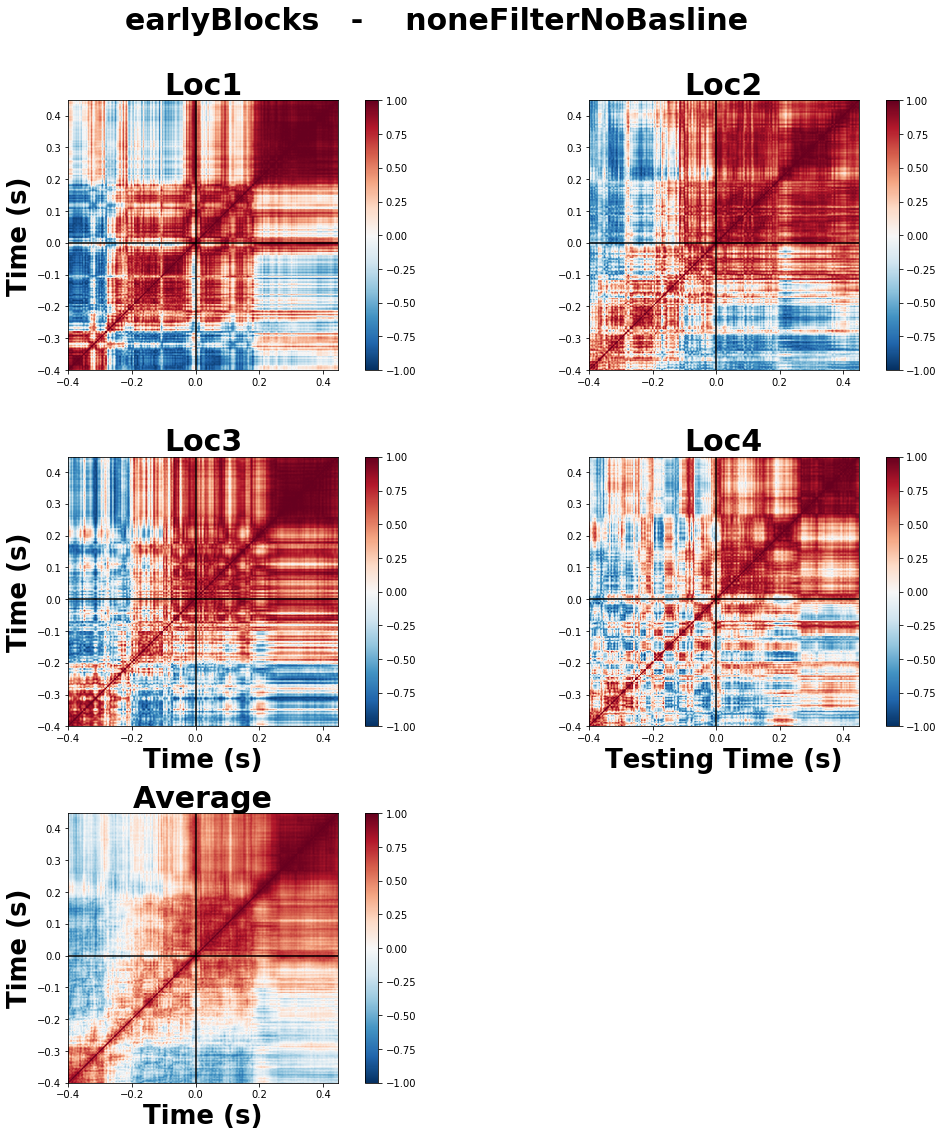

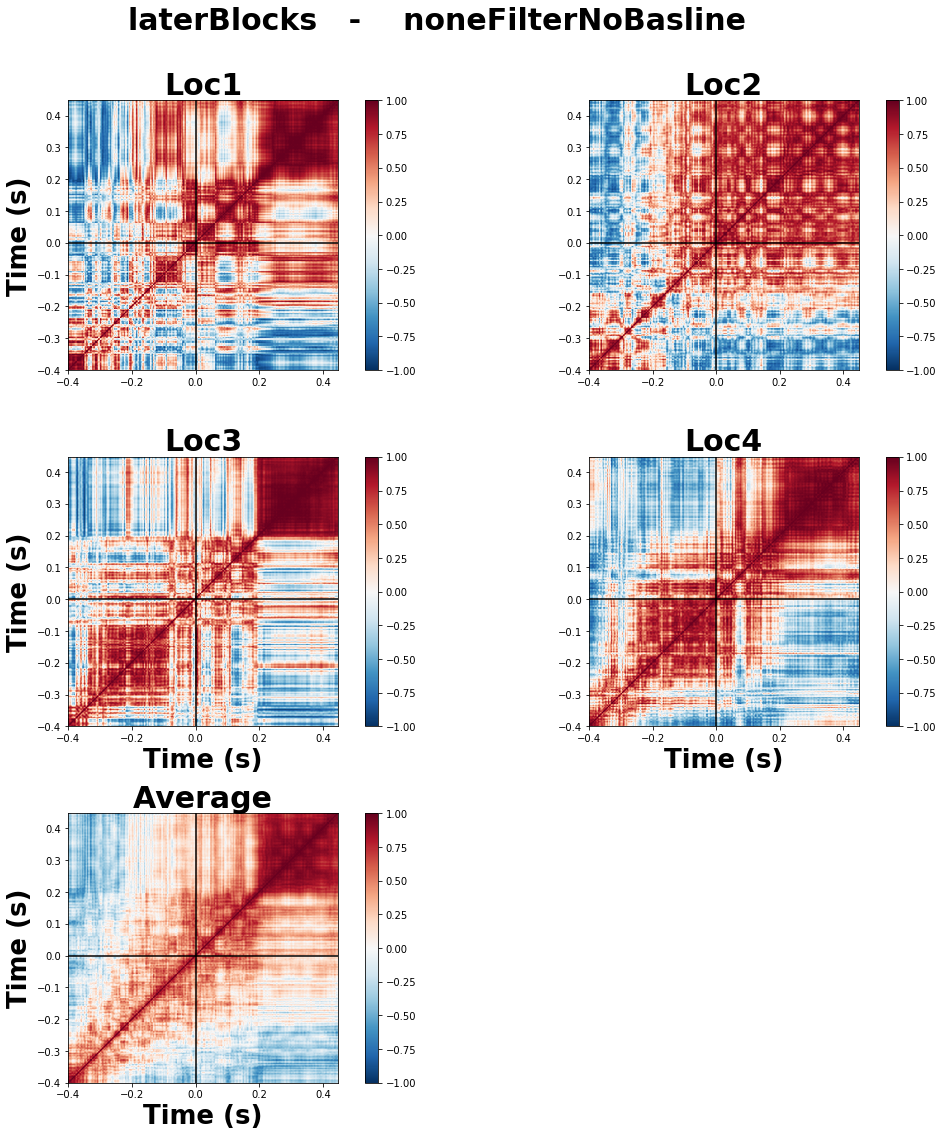

In [64]:
#  plot ------------- #
vmin=-1
vmax=1
title='noneFilterNoBasline'

plot_autocorr_eachGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax)